0.016758717596530914


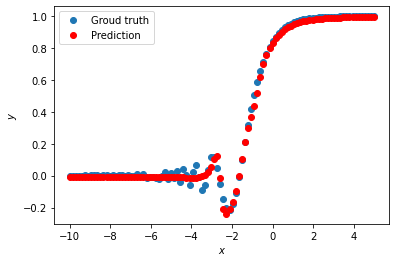

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy
def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons): # Инициализируем слои, которые нейросеть будет использовать. n_hidden_neurons - кол-во скрытых нейронов, которые будут храниться в каждом слое
        super(RegressionNet, self).__init__() # Инициализируем родительский объект
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # Создаем первый слой. Передаем кол-во входных нейронов: 1 и кол-во выходных нейронов: n_hidden_neurons
        self.act1 = torch.nn.Sigmoid() # Применяем функцию активации сигмоиду
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) # Создаем второй слой. Нашим ответом будет один нейрон, что мы пишем во втором аргументе.
        self.act2 = torch.nn.Sigmoid() # Применяем функцию активации сигмоиду
        self.fc3 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons) # Создаем второй слой. Нашим ответом будет один нейрон, что мы пишем во втором аргументе.
        self.act3 = torch.nn.Sigmoid() # Применяем функцию активации сигмоиду
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1) # Создаем второй слой. Нашим ответом будет один нейрон, что мы пишем во втором аргументе.1
    
    def forward(self, x): # функция применяющая последовательно слои в том порядке, в котором подаем.
        x = self.fc1(x) 
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

Regr_net = RegressionNet(50)

def predict(net, x, y): # Функция предсказания
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

optimizer = torch.optim.Adam(Regr_net.parameters(), lr=0.01)

def loss(pred, target):
  squares = (pred - target)**2
  return squares.mean()

for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = Regr_net.forward(x_train) # считаем предсказание нашей нейросети
    loss_val = loss(y_pred, y_train) # считаем функцию потерь

    loss_val.backward() # вычисляем градиент

    optimizer.step() # делаем шаг

predict(Regr_net, x_validation, y_validation)

def metric(pred, target):
  return (pred - target).abs().mean()
print(metric(Regr_net.forward(x_validation), y_validation).item())